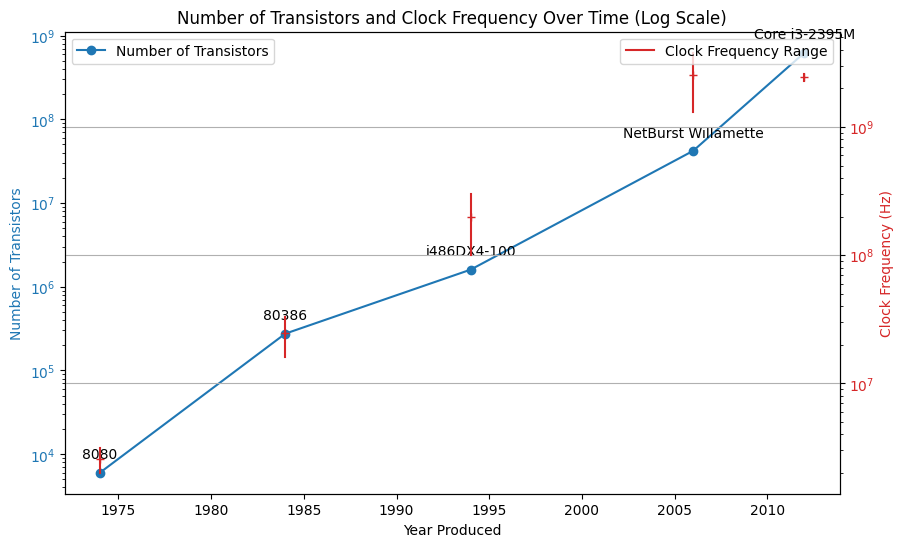

In [1]:
# 151 HW 1

# 1. Moore's Law

import matplotlib.pyplot as plt
import numpy as np

# Data
chips = ["8080", "80386", "i486DX4-100", "NetBurst Willamette", "Core i3-2395M"]
years = [1974, 1984, 1994, 2006, 2012]
transistors = [6000, 275000, 1600000, 42000000, 624000000]
clock_freq_range = [[2e6, 3.125e6], [16e6, 33e6], [100e6, 300e6], [1.3e9, 3.8e9], [2.3e9, 2.6e9]]

# Plotting Transistors
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Year Produced')
ax1.set_ylabel('Number of Transistors', color=color)
ax1.semilogy(years, transistors, marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Adding chip names as annotations
for i, chip in enumerate(chips):
    ax1.annotate(chip, (years[i], transistors[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Creating a second y-axis for Clock Frequency
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Clock Frequency (Hz)', color=color)
for i, (low_freq, high_freq) in enumerate(clock_freq_range):
    ax2.semilogy([years[i], years[i]], [low_freq, high_freq], color=color)
    ax2.semilogy(years[i], (low_freq+high_freq)/2, color=color, marker="+")

ax2.tick_params(axis='y', labelcolor=color)

# Adding legend
ax1.legend(['Number of Transistors'], loc='upper left')
ax2.legend(['Clock Frequency Range'], loc='upper right')

# Title
plt.title('Number of Transistors and Clock Frequency Over Time (Log Scale)')

# Show plot
plt.grid(True)
plt.show()


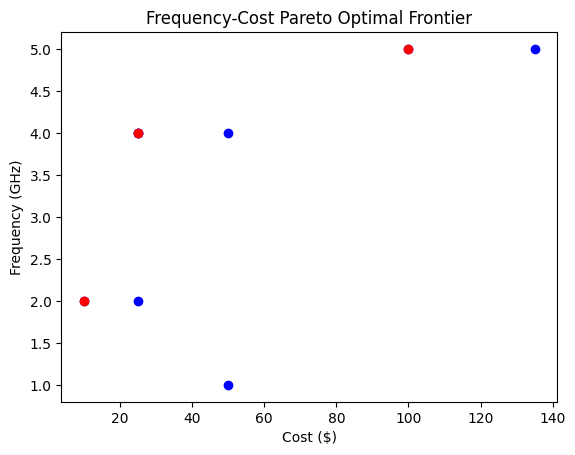

+----------+-----------------+-----------+---------+
| Cost ($) | Frequency (GHz) | Power (W) | Optimal |
+----------+-----------------+-----------+---------+
|    10    |        2        |    2.25   |    ✔    |
|    25    |        2        |    6.75   |    ✘    |
|    25    |        4        |    45.0   |    ✘    |
|    25    |        4        |    22.5   |    ✔    |
|    50    |        4        |    27.0   |    ✘    |
|    50    |        1        |   16.875  |    ✘    |
|   100    |        5        |   16.875  |    ✔    |
|   135    |        5        |   11.25   |    ✘    |
+----------+-----------------+-----------+---------+


In [8]:
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Given data
voltage = 1.5  # Vdd = 1.5V
power_constraint = 30  # W

# Processor options data
options = [
    {"frequency": 2, "capacitance": 1, "cost": 10},
    {"frequency": 2, "capacitance": 3, "cost": 25},
    {"frequency": 4, "capacitance": 10, "cost": 25},
    {"frequency": 4, "capacitance": 5, "cost": 25},
    {"frequency": 4, "capacitance": 6, "cost": 50},
    {"frequency": 1, "capacitance": 15, "cost": 50},
    {"frequency": 5, "capacitance": 3, "cost": 100},
    {"frequency": 5, "capacitance": 2, "cost": 135},
]

# Calculate power consumption for each option
for option in options:
    option["power"] = option["capacitance"] * voltage**2 * option["frequency"] / 2

# Identify points on the frequency-cost Pareto Optimal frontier
pareto_optimal = []

for option in options:
    is_optimal = True
    
    # Check if there is another option with the same frequency and lower cost
    for other_option in options:
        if other_option != option and other_option["frequency"] == option["frequency"] and other_option["cost"] < option["cost"]:
            is_optimal = False
            break
    
    # Check if there is another option with a higher frequency and the same cost
    for other_option in options:
        if other_option != option and other_option["cost"] == option["cost"] and other_option["frequency"] > option["frequency"]:
            is_optimal = False
            break
    
    # If both conditions are false, it's an optimal point
    if is_optimal and option["power"] < power_constraint:
        pareto_optimal.append(option)

# Plot the results
fig, ax = plt.subplots()

# Plot all options in blue
for option in options:
    ax.scatter(option["cost"], option["frequency"], c='blue', label='Other Options')

# Plot Pareto Optimal points in red
for option in pareto_optimal:
    ax.scatter(option["cost"], option["frequency"], c='red', label='Pareto Optimal')

# Set labels and title
ax.set_xlabel('Cost ($)')
ax.set_ylabel('Frequency (GHz)')
ax.set_title('Frequency-Cost Pareto Optimal Frontier')

# Show the plot
plt.show()

# Create a PrettyTable
table = PrettyTable()
table.field_names = ["Cost ($)", "Frequency (GHz)", "Power (W)", "Optimal"]

# Populate the table
for option in options:
    table.add_row([option["cost"], option["frequency"], option["power"], "✔" if option in pareto_optimal else "✘"])

# Print the table
print(table)